In [2]:
# environment setting
import os
import cv2
import torch 
import torchvision.transforms as transforms
from PIL import Image, ImageEnhance, ImageOps
from torch.autograd import Variable
from torch import nn
model_path = './resnext_11.pth'
img_path = './cohack/val/6/(162).jpg'

In [3]:
model = torch.load(model_path, map_location='cuda:1')
model.eval()
print('>>>>>>>>>>>>>>[INFO] Model loaded >>>>>>>>>>>>>>>')

>>>>>>>>>>>>>>[INFO] Model loaded >>>>>>>>>>>>>>>


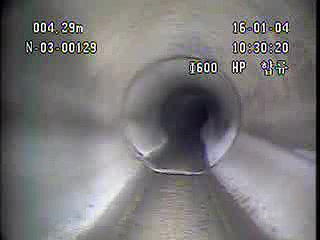

In [4]:
data_transforms = transforms.Compose([
    transforms.Resize([224,224]),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229,0.224,0.225])
])

device = torch.device("cuda:1")

image = Image.open(img_path)
image = image.convert("RGB")
#image = cv2.imread(img_path)
imgblob = data_transforms(image)

imgblob.unsqueeze_(dim=0)
imgblob = Variable(imgblob)
imgblob = imgblob.to(device)

torch.no_grad()
output = model(imgblob)
final = output

sm = torch.nn.Softmax()
final_p = sm(final) * 100


prediction = int(torch.max(final.data, 1)[1].cpu().numpy())

/home/enliai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [5]:
print("예측한 라벨: %d"%(int(prediction)+1))
print(final_p.shape)
print(final_p)

for i in range(9):
    print("클래스별 예측 확률 : %d의 예측 확률 -> %0.2f%%"%((i+1), final_p[0][i]))

예측한 라벨: 6
torch.Size([1, 9])
tensor([[4.4250e-02, 4.7296e-02, 3.1620e-01, 1.4175e-01, 6.8753e-02, 6.9144e+01,
         2.6164e-01, 2.9661e+01, 3.1461e-01]], device='cuda:1',
       grad_fn=<MulBackward0>)
클래스별 예측 확률 : 1의 예측 확률 -> 0.04%
클래스별 예측 확률 : 2의 예측 확률 -> 0.05%
클래스별 예측 확률 : 3의 예측 확률 -> 0.32%
클래스별 예측 확률 : 4의 예측 확률 -> 0.14%
클래스별 예측 확률 : 5의 예측 확률 -> 0.07%
클래스별 예측 확률 : 6의 예측 확률 -> 69.14%
클래스별 예측 확률 : 7의 예측 확률 -> 0.26%
클래스별 예측 확률 : 8의 예측 확률 -> 29.66%
클래스별 예측 확률 : 9의 예측 확률 -> 0.31%
